Let's explore how convolutions work by creating a basic convolution on a 2D Grey Scale image. First we can load the image by taking the 'ascent' image from scipy. It's a nice, built-in picture with lots of angles and lines. 

In [2]:
import cv2
import numpy as np
from scipy import misc
i = misc.ascent() # Get built-in image

Next, we can use the pyplot library to draw the image so we know what it looks like.

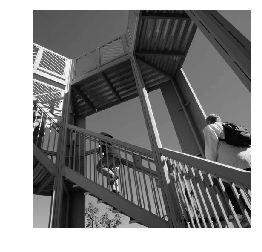

In [4]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)

The image is stored as a numpy array, so we can create the transformed image by just copying that array. Let's also get the dimensions of the image so we can loop over it later. 

In [8]:
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]
print(f'{i_transformed.shape}')

(512, 512)


Now we can create a filter as a 3x3 array. 

In [14]:
# This filter detects edges nicely
# It creates a convolution that only passes through sharp edges and straight
# lines.

#Experiment with different values for fun effects.
#filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]

# A couple more filters to try for fun!
# filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
#filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
filter = [ [1, 1, 1], [1, -7, 1], [1, 1, 1]]

# If all the digits in the filter don't add up to 0 or 1, you 
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight  = 1
print(f'Filter sum={np.sum(filter)}')

Filter sum=1


Now let's create a convolution. We will iterate over the image, leaving a 1 pixel margin, and multiply out each of the neighbors of the current pixel by the value defined in the filter. 

i.e. the current pixel's neighbor above it and to the left will be multiplied by the top left item in the filter etc. etc. We'll then multiply the result by the weight, and then ensure the result is in the range 0-255

Finally we'll load the new value into the transformed image. 

In [15]:
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      convolution = 0.0
      convolution = convolution + (i[x - 1, y-1] * filter[0][0])
      convolution = convolution + (i[x, y-1] * filter[0][1])
      convolution = convolution + (i[x + 1, y-1] * filter[0][2])
      convolution = convolution + (i[x-1, y] * filter[1][0])
      convolution = convolution + (i[x, y] * filter[1][1])
      convolution = convolution + (i[x+1, y] * filter[1][2])
      convolution = convolution + (i[x-1, y+1] * filter[2][0])
      convolution = convolution + (i[x, y+1] * filter[2][1])
      convolution = convolution + (i[x+1, y+1] * filter[2][2])
      convolution = convolution * weight
      if(convolution<0):
        convolution=0
      if(convolution>255):
        convolution=255
      i_transformed[x, y] = convolution

Now we can plot the image to see the effect of the convolution!

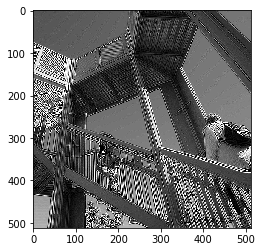

In [16]:
# Plot the image. Note the size of the axes -- they are 512 by 512
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
#plt.axis('off')
plt.show()   

This code will show a (2, 2) pooling. The idea here is to iterate over the image, and look at the pixel and it's immediate neighbors to the right, beneath, and right-beneath. Take the largest of them and load it into the new image. Thus the new image will be 1/4 the size of the old -- with the dimensions on X and Y being halved by this process. You'll see that the features get maintained despite this compression!

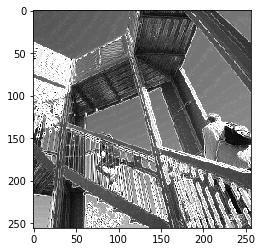

In [17]:
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    pixels = []
    pixels.append(i_transformed[x, y])
    pixels.append(i_transformed[x+1, y])
    pixels.append(i_transformed[x, y+1])
    pixels.append(i_transformed[x+1, y+1])
    newImage[int(x/2),int(y/2)] = max(pixels)

# Plot the image. Note the size of the axes -- now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
#plt.axis('off')
plt.show()      
    
    

In [51]:
img = cv2.imread('/Users/vmaudgalya/Desktop/profile.jpg', 0)
print(img.shape)

(440, 440)


In [52]:
image_copy = np.copy(img)
size_x = image_copy.shape[0]
size_y = image_copy.shape[1]
# Filter from here: https://lodev.org/cgtutor/filtering.html
filter = [ [-1, -1, 0], [-1, 0, 1], [0, 1, 1]]

In [53]:
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
#     for z in range(3):
      convolution = 0.0
#       convolution = convolution + (img[x-1, y-1, z]     * filter[0][0])
#       convolution = convolution + (img[x  , y-1, z]     * filter[0][1])
#       convolution = convolution + (img[x+1, y-1, z]     * filter[0][2])
#       convolution = convolution + (img[x-1, y  , z]     * filter[1][0])
#       convolution = convolution + (img[x  , y  , z]     * filter[1][1])
#       convolution = convolution + (img[x+1, y  , z]     * filter[1][2])
#       convolution = convolution + (img[x-1, y+1, z]     * filter[2][0])
#       convolution = convolution + (img[x  , y+1, z]     * filter[2][1])
#       convolution = convolution + (img[x+1, y+1, z]     * filter[2][2])

        
      convolution = convolution + (img[x-1, y-1]     * filter[0][0])
      convolution = convolution + (img[x  , y-1]     * filter[0][1])
      convolution = convolution + (img[x+1, y-1]     * filter[0][2])
      convolution = convolution + (img[x-1, y  ]     * filter[1][0])
      convolution = convolution + (img[x  , y  ]     * filter[1][1])
      convolution = convolution + (img[x+1, y  ]     * filter[1][2])
      convolution = convolution + (img[x-1, y+1]     * filter[2][0])
      convolution = convolution + (img[x  , y+1]     * filter[2][1])
      convolution = convolution + (img[x+1, y+1]     * filter[2][2])
        
      convolution = convolution * weight
      if(convolution<0):
        convolution=0
      if(convolution>255):
        convolution=255
#       image_copy[x, y, z] = convolution
      image_copy[x, y] = convolution

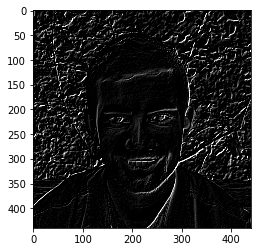

In [54]:
plt.imshow(image_copy)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


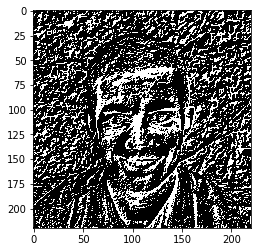

In [57]:
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y, 3))
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
#     for z in range(3):
        pixels = []

        pixels.append(image_copy[x, y])
        pixels.append(image_copy[x+1, y])
        pixels.append(image_copy[x, y+1])
        pixels.append(image_copy[x+1, y+1])
        newImage[int(x/2),int(y/2)] = min(pixels)
    
    
#         pixels.append(image_copy[x, y, z])
#         pixels.append(image_copy[x+1, y, z])
#         pixels.append(image_copy[x, y+1, z])
#         pixels.append(image_copy[x+1, y+1, z])
#         newImage[int(x/2),int(y/2), z] = min(pixels)

# Plot the image. Note the size of the axes -- now 256 pixels instead of 512
plt.grid(False)
plt.imshow(newImage)
#plt.axis('off')
plt.show()     